#Multi-Threading For Linear Regression

In [15]:
import threading
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

def train_logistic_regression(X_train, y_train, X_test, y_test, num_threads):
    start_time = time.time()

    models = []
    threads = []

    for _ in range(num_threads):
        model = LogisticRegression(max_iter=1000)
        models.append(model)

    # Split the data into equal parts for each thread
    X_train_splits = np.array_split(X_train, num_threads)
    y_train_splits = np.array_split(y_train, num_threads)

    def train_model_thread(model, X, y):
        model.fit(X, y)

    # Create and start threads
    for i in range(num_threads):
        thread = threading.Thread(target=train_model_thread, args=(models[i], X_train_splits[i], y_train_splits[i]))
        threads.append(thread)
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

    # Combine models and average coefficients
    final_model = LogisticRegression(max_iter=1000)
    final_model.coef_ = np.mean([model.coef_ for model in models], axis=0)
    final_model.intercept_ = np.mean([model.intercept_ for model in models], axis=0)

    # Fit the final model on the entire training set
    final_model.fit(X_train, y_train)

    end_time = time.time()

    # Make predictions on the test set
    y_pred = final_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, end_time - start_time

# Generate synthetic data for testing
np.random.seed(42)
X = np.random.rand(10000000, 10)
y = np.random.randint(2, size=10000000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of thread counts
thread_counts = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
#thread_counts = [1, 2, 4, 8, 12, 16, 32]
# Measure accuracy and time for different thread counts
accuracies = []
execution_times = []

for num_threads in thread_counts:
    accuracy, exec_time = train_logistic_regression(X_train, y_train, X_test, y_test, num_threads)
    accuracies.append(accuracy)
    execution_times.append(exec_time)




In [16]:
print(execution_times)

[10.895817995071411, 10.035191774368286, 8.063402652740479, 8.1424880027771, 7.15106725692749, 6.967603921890259, 7.034933805465698, 7.096587419509888, 6.907097339630127, 6.6542863845825195, 6.956207513809204, 7.280874967575073, 6.904577732086182, 6.799376487731934, 6.810149192810059, 6.490087270736694, 5.875179767608643, 5.688502788543701, 5.605335474014282, 5.717425107955933, 5.7095701694488525, 5.672122001647949, 5.71302342414856]


In [17]:
# Calculate speedup and efficiency
baseline_time = execution_times[0]
speedup = [baseline_time / t for t in execution_times]
efficiency = [s / t for s, t in zip(speedup, thread_counts)]



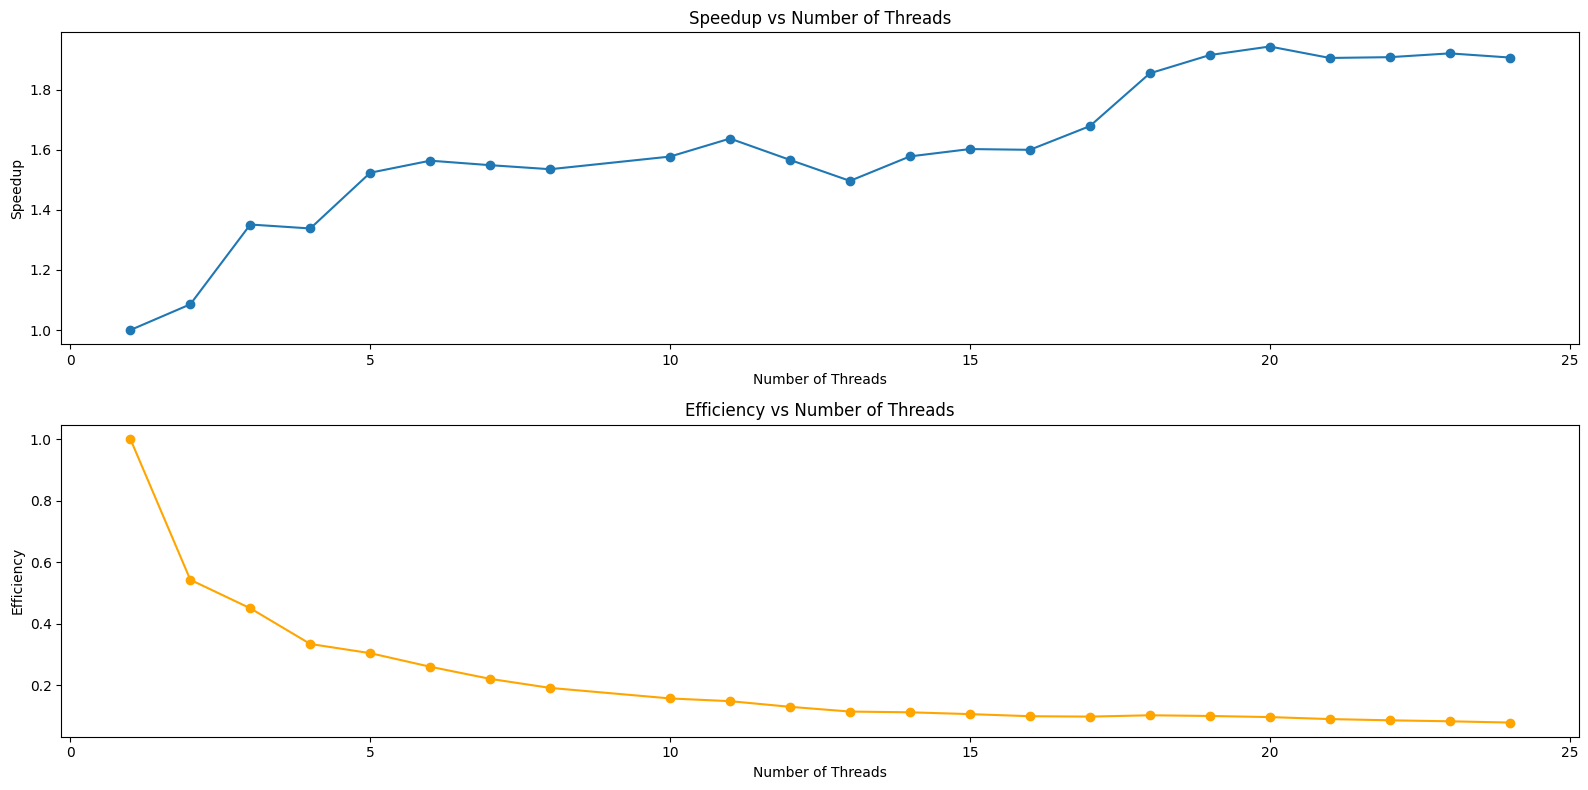

In [18]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.plot(thread_counts, speedup, marker='o')
plt.title('Speedup vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')

plt.subplot(2, 1, 2)
plt.plot(thread_counts, efficiency, marker='o', color='orange')
plt.title('Efficiency vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.savefig("SpeedUP_eff_Logistic_Regress.png")
plt.tight_layout()
plt.show()

#KMeans Clustering on random data in Multi Threading

In [47]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import threading
import time
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100000000, 2)

# Number of clusters
n_clusters = 3

#Number of threads for parallel processing
#num_threads_list = [1, 2, 4, 8, 12, 16, 24, 28, 32]
num_threads_list = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

# Function for K-Means clustering with multithreading
def kmeans_thread(X_thread, kmeans, lock):
    with lock:
        kmeans.partial_fit(X_thread)

# Function to measure execution time with multithreading
def measure_time(X, num_threads):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init=3)
    lock = threading.Lock()

    X_splits = np.array_split(X, num_threads)
    threads = []

    start_time = time.time()

    for i in range(num_threads):
        thread = threading.Thread(target=kmeans_thread, args=(X_splits[i], kmeans, lock))
        threads.append(thread)

    for thread in threads:
        thread.start()

    for thread in threads:
        thread.join()

    end_time = time.time()

    return end_time - start_time

# Benchmark with different numbers of threads
execution_times = []

for num_threads in num_threads_list:
    execution_time = measure_time(X, num_threads)
    execution_times.append(execution_time)


In [48]:
# Calculate speedup and efficiency
baseline_time = execution_times[0]
speedup = [baseline_time / t for t in execution_times]
efficiency = [s / num_threads for s, num_threads in zip(speedup, num_threads_list)]

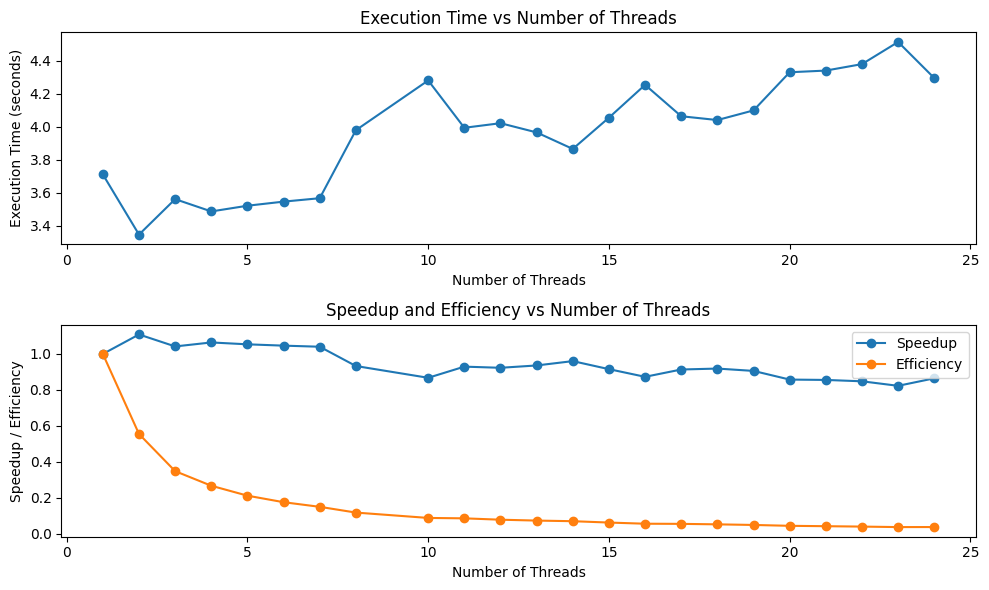

In [49]:
# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(num_threads_list, execution_times, marker='o')
plt.title('Execution Time vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')

plt.subplot(2, 1, 2)
plt.plot(num_threads_list, speedup, marker='o', label='Speedup')
plt.plot(num_threads_list, efficiency, marker='o', label='Efficiency')
plt.title('Speedup and Efficiency vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup / Efficiency')
plt.legend()
plt.savefig("Kmeans.png")
plt.tight_layout()
plt.show()

#Multi-Threading for FashionMNIST dataset

**This means that during the training process, TensorFlow will use four worker threads to load and preprocess batches concurrently. This can lead to faster data processing, especially if the data loading and preprocessing are significant bottlenecks in your training pipeline.**

**It's important to note that the effectiveness of using multiple threads depends on various factors, including the complexity of your model, the size of your dataset, and the nature of your data preprocessing. In some cases, using more threads might lead to better performance, while in other cases, the overhead of managing multiple threads might outweigh the benefits.**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import multiprocessing
import time
import os
import matplotlib.pyplot as plt
#os.environ["OMP_NUM_THREADS"] = "2"
#os.environ["TF_NUM_INTRAOP_THREADS"] = "2"
#os.environ["TF_NUM_INTEROP_THREADS"] = "2"

# Function to train the model
def train_model(num_threads):
    # Set the number of threads before any TensorFlow operation
  #  tf.config.threading.set_intra_op_parallelism_threads(num_threads)
   # tf.config.threading.set_inter_op_parallelism_threads(num_threads)

    # Load the Fashion MNIST dataset
    (train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

    # Preprocess the data
    train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
    test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

    train_labels = tf.keras.utils.to_categorical(train_labels)
    test_labels = tf.keras.utils.to_categorical(test_labels)

    # Build a simple convolutional neural network
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Create a data generator with multi-threading
    train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    train_generator = train_data_gen.flow(train_images, train_labels, batch_size=128, shuffle=True)
    test_generator = test_data_gen.flow(test_images, test_labels, batch_size=128, shuffle=False)

    # Record start time
    start_time = time.time()

    # Train the model using fit_generator with multi-threading
    #model.fit_generator(train_generator,
                        #steps_per_epoch=len(train_images) // 128,
                        #epochs=5,
                        #workers=num_threads,
                        #use_multiprocessing=True,
                        #validation_data=test_generator,
                        #validation_steps=len(test_images) // 128)
    
    model.fit(train_generator,
          steps_per_epoch=len(train_images) // 128,
          epochs=5,
          workers=num_threads,
          use_multiprocessing=True,
          validation_data=test_generator,
          validation_steps=len(test_images) // 128)
    
    # Record end time
    end_time = time.time()

    # Return execution time
    return end_time - start_time

# Define the range of thread counts
#thread_counts = [1, 2, 4, 8, 12, 16, 32]
thread_counts = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 24]
# Measure execution times for different thread counts
execution_times = [train_model(num_threads) for num_threads in thread_counts]











Epoch 1/5




Exception in thread Thread-7 (_run):
Traceback (most recent call last):
  File "C:\Users\rauna\anaconda3\envs\myenv\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\rauna\anaconda3\envs\myenv\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\rauna\anaconda3\envs\myenv\lib\site-packages\keras\src\utils\data_utils.py", line 829, in _run
    with closing(self.executor_fn(_SHARED_SEQUENCES)) as executor:
  File "C:\Users\rauna\anaconda3\envs\myenv\lib\site-packages\keras\src\utils\data_utils.py", line 804, in pool_fn
    pool = get_pool_class(True)(
  File "C:\Users\rauna\anaconda3\envs\myenv\lib\multiprocessing\context.py", line 119, in Pool
    return Pool(processes, initializer, initargs, maxtasksperchild,
  File "C:\Users\rauna\anaconda3\envs\myenv\lib\multiprocessing\pool.py", line 215, in __init__
    self._repopulate_pool()
  File "C:\Users\rauna\anaconda3\envs\myenv\lib\multiprocessing\pool.py", line 

In [2]:
execution_times

[49.03627943992615,
 74.46152901649475,
 60.00956892967224,
 69.65773153305054,
 76.8277313709259,
 67.83598470687866,
 65.24978756904602,
 71.60240769386292,
 62.68712544441223,
 53.07347559928894,
 60.46532964706421]

In [3]:
baseline_time = execution_times[0]
speedup = [baseline_time / t for t in execution_times]
efficiency = [s / num_threads for s, num_threads in zip(speedup, thread_counts)]

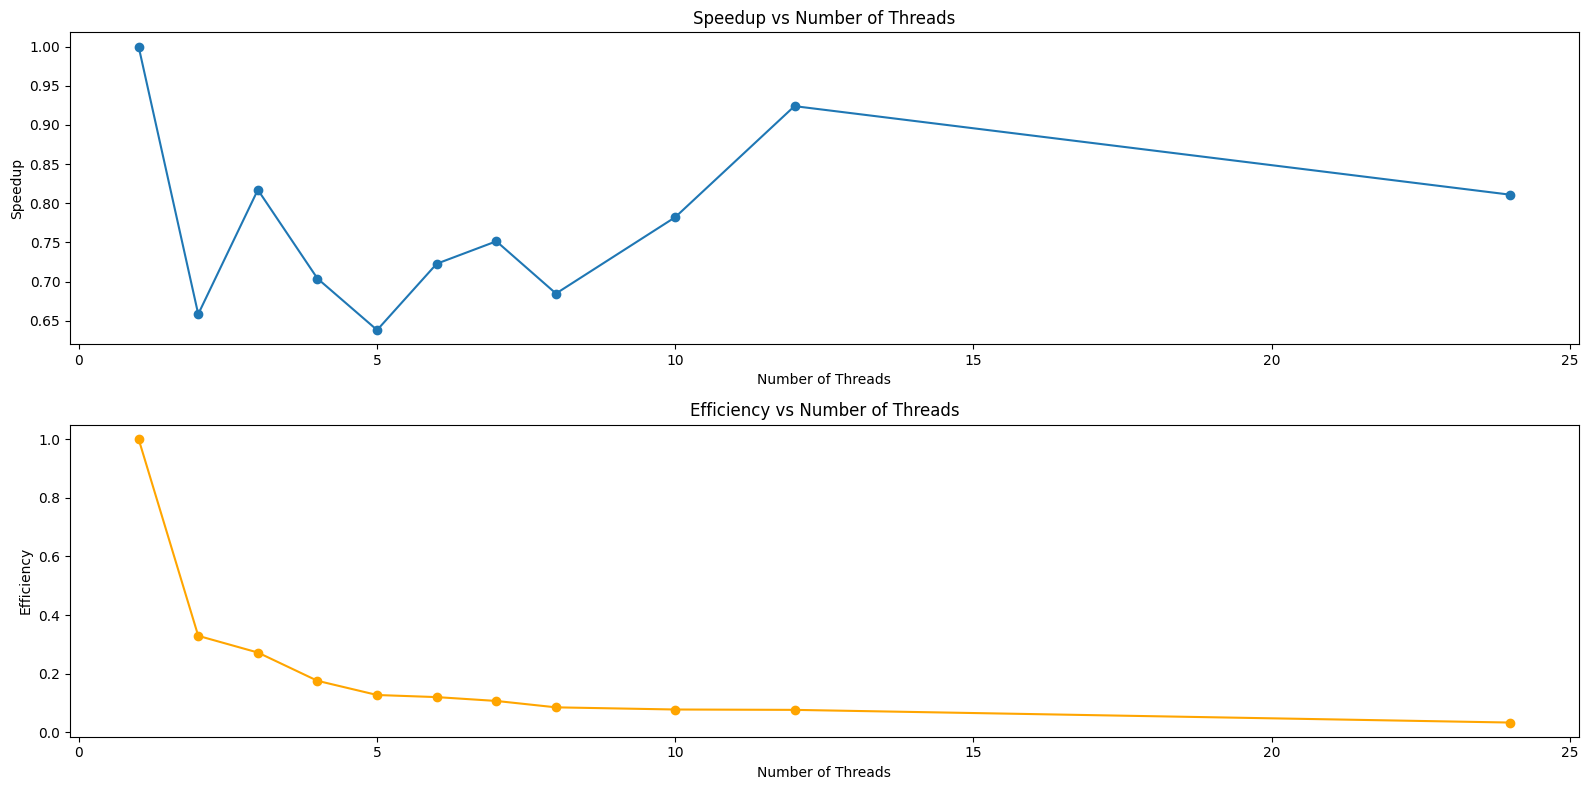

In [4]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.plot(thread_counts, speedup, marker='o')
plt.title('Speedup vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')

plt.subplot(2, 1, 2)
plt.plot(thread_counts, efficiency, marker='o', color='orange')
plt.title('Efficiency vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.savefig("SpeedUP_eff_Fash_MNIST.png")
plt.tight_layout()
plt.show()